!jt -t chesterish
# !jt -r

In [1]:
from genetic_algorithm import *
from numpy.random import default_rng
from tqdm import tqdm
from itertools import permutations#product #combinations_with_replacement
%matplotlib notebook

import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

import copy
from collections import Counter
import pandas as pd

In [6]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 100

individuals = generate_initial_genomes_for_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner)

## world size
world_size_x = 20
world_size_y = 20

rng = default_rng()
x = rng.choice(world_size_x, size=nr_individuals, replace=True)
y = rng.choice(world_size_y, size=nr_individuals, replace=True)

items = list(permutations(np.append(x, y), 2))
items_nr = len(items)
indexes = np.random.choice(items_nr, nr_individuals, replace=False)
pos = np.array(items)[indexes]

## initial brain and position generator

result = calculate_individual_output_weights(individuals)

## assign position and remove brains without output

indiv_to_del = []
for indiv in result:
    if result[indiv]['out']:
        result[indiv]['position'] = [list(pos[indiv])]
    else:
        indiv_to_del.append(indiv)

for key in indiv_to_del:
    del result[key] 

In [7]:
result
    

{0: {'out': {'out3': 0.506, 'out0': 0.06, 'out1': 0.881},
  'brain': {'in0mid0': ['in0', 'mid0', 1.4032046390965969],
   'mid0out3': ['mid0', 'out3', -3.032626278040592],
   'mid2mid2': ['mid2', 'mid2', 2.1712192888753243],
   'in1out0': ['in1', 'out0', -1.6318632687318786],
   'mid2out1': ['mid2', 'out1', 3.5608728826491682],
   'mid0out0': ['mid0', 'out0', -1.4264001220814895]},
  'in': ['in1', 'in0'],
  'position': [[14, 9]]},
 1: {'out': {'out2': 0.744, 'out0': 0.973},
  'brain': {'in1out2': ['in1', 'out2', 0.5327636197161605],
   'in0mid1': ['in0', 'mid1', 3.7623073401495497],
   'mid2out0': ['mid2', 'out0', -1.23790630245689],
   'mid0mid2': ['mid0', 'mid2', 1.698763924919884],
   'in0mid0': ['in0', 'mid0', 3.1637417976499314],
   'in1out0': ['in1', 'out0', 3.022371432931482]},
  'in': ['in1', 'in0'],
  'position': [[18, 9]]},
 2: {'out': {'out3': 0.84, 'out0': 0.99},
  'brain': {'mid2mid1': ['mid2', 'mid1', -1.6936365023653288],
   'in0out3': ['in0', 'out3', 0.8285670685182359],

In [3]:
nr_of_errors = 0

k = 100
n = 0
pbar = tqdm(total=k, initial=n)

while k>n: 
    pbar.update(1)
#     print('n',n)
    for indiv in result:
#         print('indiv', indiv)
        x, y = result[indiv]['position'][-1][0], result[indiv]['position'][-1][1]
        position_list = []
        for out in result[indiv]['out']:
#             if 'out' in out:
            new_pos = move(out, result[indiv]['out'][out])
            position_list.append(new_pos)
        if position_list:
            position_list = list(map(sum, zip(*position_list)))
            position_list = make_smaller_(position_list)
            position_list = list(map(sum, zip(*[[x, y]] + [position_list])))

            position_list[0] = normalize_position_if_outside_world(position_list[0], world_size_x)
            position_list[1] = normalize_position_if_outside_world(position_list[1], world_size_y)
    #         print('norm', position_list)
            result[indiv]['position'].append(position_list)
    ######### if n>=1 proceed with neurons #######        
            if n >= 1:
                apply_input(result, indiv)
            else:
                pass

    last_pos_list = {obj:result[obj]['position'][-1] for obj in result}
#         prevent_overlap_movement(last_pos_list, result)
    
    for key_1, val_1 in last_pos_list.items():
        last_pos_list_copy = copy.copy(last_pos_list)
        del last_pos_list_copy[key_1]
        for key_2, val_2 in last_pos_list_copy.items():
            if val_1 == val_2:
                try:
                    result[key_2]['position'][-1] == result[key_2]['position'][-2]
                except IndexError:
                    print(indiv)
    n += 1
pbar.close()


100%|████████████████████████████████| 100/100 [00:01<00:00, 82.39it/s]


In [4]:
df = pd.DataFrame()
for key in result:
    df[key] = pd.Series(result[key]['position']).apply(lambda x: float('.'.join((str(x[0]),str(x[1])))))

In [9]:
Counter(df.iloc[0,:])

Counter({10.4: 1,
         14.19: 1,
         4.14: 1,
         0.1: 2,
         4.4: 1,
         19.3: 2,
         2.19: 1,
         15.18: 1,
         15.1: 3,
         12.17: 1,
         9.11: 1,
         11.2: 1,
         4.2: 1,
         12.4: 1,
         12.1: 1,
         15.8: 1,
         5.14: 1,
         1.14: 1,
         7.7: 1,
         18.6: 1,
         10.6: 1,
         18.1: 3,
         9.7: 1,
         1.8: 1,
         5.4: 1,
         10.16: 2,
         12.7: 1,
         14.8: 2,
         7.13: 1,
         14.14: 1,
         9.12: 1,
         16.15: 1,
         16.7: 1,
         13.1: 2,
         1.13: 1,
         12.0: 1,
         19.4: 1,
         6.1: 1,
         12.12: 2,
         4.3: 1,
         7.4: 1,
         1.9: 1,
         7.2: 1,
         17.0: 1,
         1.17: 1,
         0.17: 1,
         5.1: 1,
         2.6: 1,
         19.11: 1,
         10.19: 1,
         5.15: 1,
         14.11: 1,
         13.12: 1,
         4.16: 1,
         10.2: 1,
         9.16

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,10.4,14.19,4.14,0.1,4.4,19.3,2.19,15.18,15.1,12.17,...,1.1,17.17,19.3,16.18,5.6,17.8,13.4,14.17,5.9,5.9
1,9.4,13.19,4.14,0.0,5.4,19.3,1.18,14.17,15.9,11.16,...,0.1,17.18,18.3,17.19,6.6,16.8,13.4,13.17,6.9,5.9
2,8.4,12.19,5.14,0.0,6.4,19.3,0.17,13.16,15.8,10.17,...,0.1,17.17,17.2,18.20,7.6,15.8,13.4,13.17,7.9,5.9
3,7.4,12.18,5.14,0.0,7.4,19.3,0.17,12.15,15.8,9.18,...,0.1,17.18,16.1,19.20,7.6,14.8,13.3,12.16,8.9,5.9
4,6.4,12.18,5.14,0.0,8.4,19.3,0.16,11.14,15.7,8.19,...,0.1,17.18,15.0,20.20,8.6,13.8,14.2,11.15,9.9,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.4,0.00,20.14,0.0,20.2,19.3,0.00,0.00,15.0,0.20,...,0.1,18.14,0.0,20.20,20.6,0.8,20.1,0.00,20.8,5.9
97,0.4,0.10,20.14,0.0,20.2,19.3,0.00,0.00,15.0,0.20,...,0.1,18.14,0.0,20.20,20.6,0.8,20.1,0.00,20.8,5.9
98,0.4,0.10,20.14,0.0,20.2,19.3,0.00,0.00,15.0,0.20,...,0.1,18.14,0.0,20.20,20.6,0.8,20.1,0.00,20.8,5.9
99,0.4,0.10,20.14,0.0,20.2,19.3,0.00,0.00,15.0,0.20,...,0.1,18.14,0.0,20.20,20.6,0.8,20.0,0.00,20.8,5.9


In [5]:
last_pos_list= [[tuple(result[obj]['position'][-1])] for obj in result]

In [53]:
from itertools import chain
Counter(chain(*np.array(items)[indexes])).most_common()

[(3, 19),
 (8, 19),
 (19, 16),
 (12, 15),
 (18, 13),
 (2, 12),
 (5, 11),
 (10, 11),
 (11, 10),
 (7, 10),
 (9, 10),
 (1, 10),
 (16, 9),
 (13, 8),
 (17, 8),
 (4, 5),
 (0, 4),
 (6, 4),
 (15, 4),
 (14, 2)]

generate dictionary of coords 

In [7]:
coords = [{'x':[], 'y':[]} for key in range(len(result[indiv]['position']))]
for indiv in result:
    for pos_nr, pos in enumerate(result[indiv]['position']):
        coords[pos_nr]['x'].append(pos[0])
        coords[pos_nr]['y'].append(pos[1])

visualisation

<IPython.core.display.Javascript object>


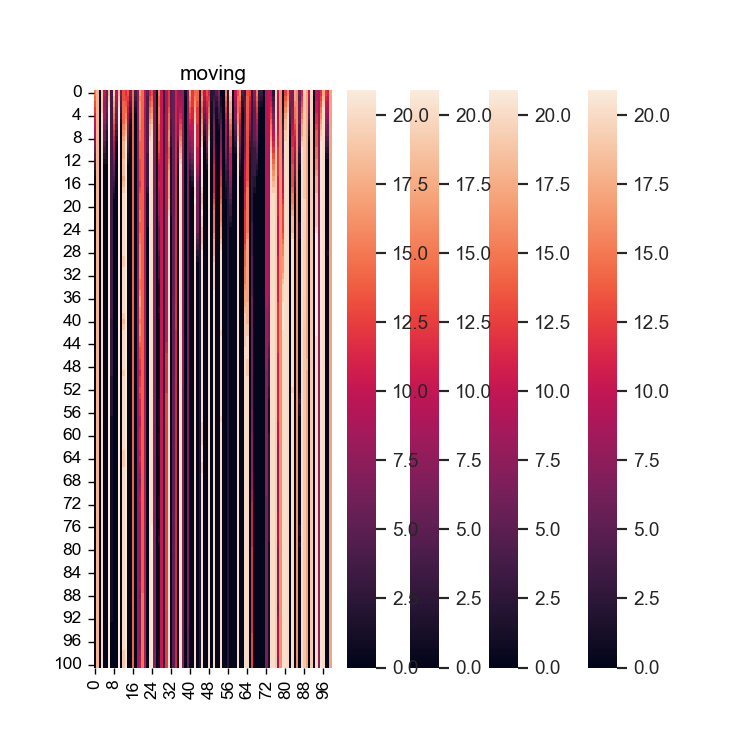

In [8]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Blues(.2))

    ax.set_xlim([0,world_size_x])
    ax.set_ylim([0,world_size_y])
    ax.set_title('moving')
    ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
    [spine.set_visible(False) for spine in ax.spines.values()] #remove chart 
    
fig, ax = plt.subplots(figsize=(6,6))
anime = FuncAnimation(
    fig = fig,
    func = update,
    frames = len(coords),
    interval = 10, repeat=False
)


### mutation

hexa to binary

In [9]:
binary = bin(int(individuals[0][0].hex_id, 16))[2:]
if len(binary) < 32:
    factor = 32 - len(binary)
    binary = '0' * factor + binary
binary

'11001110110010001010001011001110'